In [1]:
from __future__ import print_function, division
import os, bz2, json, time, tqdm
from datetime import timedelta

import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import my_util

In [2]:
# import importlib
# importlib.reload(my_util)

In [3]:
categories = ["activism","autos","comedy","education","entertainment", \
              "film","gaming","howto","movies","music",\
              "news","people","pets","science","shows",\
              "sports","trailers","travel"]

eval_days = [90, 135, 180, 225, 270]

In [4]:
dataset_base = "G:/MLCV dataset/engagement'16/tweeted_videos" 
# dataset_base = "G:/MLCV dataset/engagement'16/quality_videos"
# test_category = categories[10]
test_category = "news"
# test_category = "gaming"
# test_category = "vevo"

with open(os.path.join(dataset_base, test_category+".json"), "r") as f:
    dataset_json = f.readlines()

#### Preprocess dataset

In [5]:
# dict-like dataset
dataset = {}
# attributes
vids_set = set()
vids = []
days = []
views = []
shares = []
watches = []
for line in tqdm.tqdm(dataset_json):
    record = json.loads(line)
    try:
        category_id = int(record['snippet']['categoryId'])
        day = [int(x) for x in record['insights']['days'].split(",")]
        
        """!!!"""
        if len(day) < eval_days[-1]: continue

        view = [int(x) for x in record['insights']['dailyView'].split(",")]
        share = [int(x) for x in record['insights']['dailyShare'].split(",")]
        watch = [float(x) for x in record['insights']['dailyWatch'].split(",")]
    except:
        continue
    dataset[record['id']] = (category_id, day, view, share, watch)
    
    if record['id'] in vids_set:
        continue
    vids_set.add(record['id'])
    
    vids.append(record['id'])
    days.append(day)
    views.append(view)
    shares.append(share)
    watches.append(watch)
print("dataset size:", len(vids))

100%|███████████████████████████████████████████████████████████████████████| 459728/459728 [00:29<00:00, 15765.95it/s]


dataset size: 37508


#### Stats

In [6]:
# print("Min days",np.min([len(x) for x in days]))
# print("Max days",np.max([len(x) for x in days]))
# print("Average days",np.average([len(x) for x in days]))

#### Analysis

In [7]:
# df_total_views_no_filter = my_util.total_at_no_filter(eval_days, views, vids, accumulate=True)
# pop_percs = my_util.pop_perc_at(eval_days, views, vids, accumulate=True)

In [8]:
# fig = plt.figure(figsize=(12, 6))
# total_views_binned = my_util.plot_popPerc_totalViews(eval_days[:2], df_total_views_no_filter, pop_percs, fig)

In [9]:
# df_total_views = my_util.total_at(eval_days, views, vids, accumulate=False)
df_total_views_log = my_util.total_log_at(eval_days, views, vids, accumulate=False)

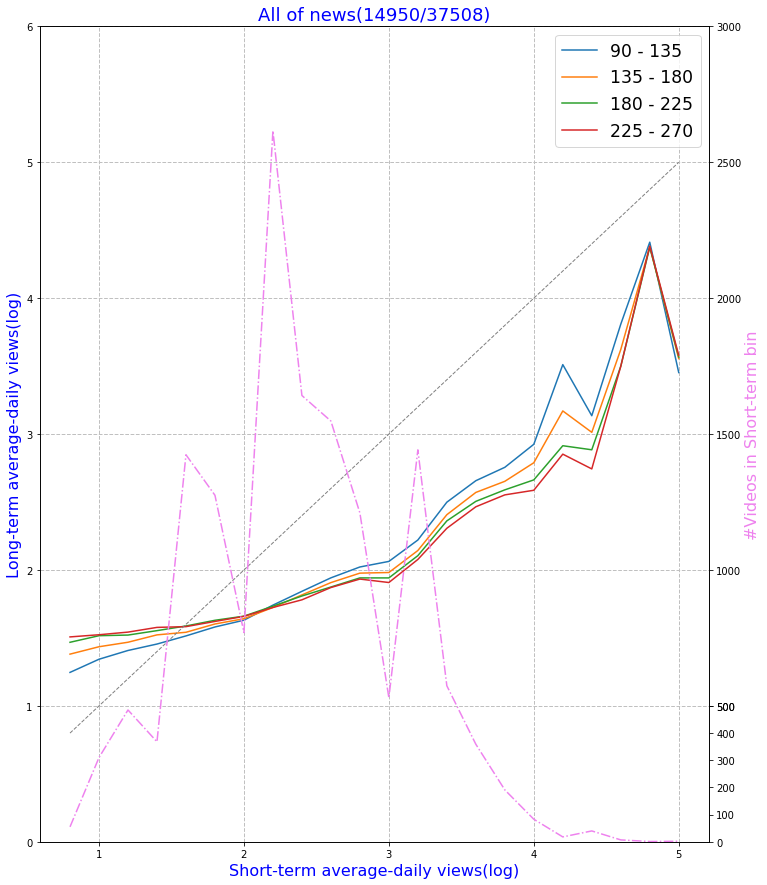

In [10]:
fig = plt.figure(figsize=(12, 15))
title = "All of {}({}/{})".format(test_category, len(df_total_views_log.index), len(vids))
res, xs, yss = my_util.plot_fixed_window_bin_smooth(eval_days, df_total_views_log, test_category, fig,\
                          title, average_daily=True, smooth_times = 2)
plt.savefig('figs/bin_smooth/{}.png'.format(test_category), bbox_inches='tight')

In [11]:
# area to y=x line
areas1 = []
for ys in yss:
    area = my_util.area_between_scatter_lines(ys, xs, xs)
    areas1.append(area)
areas2 = []
for i in range(len(yss)-1):
    area = my_util.area_between_scatter_lines(yss[i], yss[i+1], xs)
    areas2.append(area)
print(eval_days)
print(areas1)
print(areas2)

[90, 135, 180, 225, 270]
[2.747971769784906, 3.0600102256746275, 3.272887471151824, 3.3919168522958363]
[0.35642565096528667, 0.2559939506920248, 0.1248771447695955]


In [12]:
stat_path = "./stats/smooth_times=2.csv"
line = test_category+","\
        +",".join(["{:.3f}".format(x) for x in areas1]) + ","\
        +",".join(["{:.3f}".format(x) for x in areas2])
with open(stat_path, "a") as f:
    f.write("{}\n".format(line))